In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme(style='whitegrid')
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 12.0
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('BookDataset.csv').iloc[:,1:]

In [3]:
map_genre = {
    "Humor/Family": "Humor/Family/Romance",
    "Self-Help": "Self-Help",
    "Suspense/Mystery": "Suspense/Mystery",
    "Fantasy/Adventure": "Fantasy/Adventure",
    "Biography/Historical": "Biography/Historical/Memoir",
    "Romance": "Humor/Family/Romance",
    "Horror/Thriller": "Horror/Thriller",
    "Memoir": "Biography/Historical/Memoir",
    "Poetry/Novel": "Miscellaneous",
    "Historical/Fiction": "Biography/Historical/Memoir",
    "Novel": "Miscellaneous",
    "Non-Fiction": "Miscellaneous",
    "Folklore": "Fantasy/Adventure",
    "Travel": "Biography/Historical/Memoir",
    "Adventure": "Fantasy/Adventure",
    "Novel/Feminism": "Miscellaneous",
    "Historical/Family": "Biography/Historical/Memoir",
    "Children's/Humor": "Humor/Family/Romance",
    "Magical Realism/Historical": "Biography/Historical/Memoir",
    "Fantasy/Horror": "Fantasy/Adventure",
    "Political/Dystopian": "Fantasy/Adventure",
    "Self-help/Management": "Self-Help",
    "Historical/Adventure": "Fantasy/Adventure",
    "Thriller/Suspense": "Suspense/Mystery",
    "War/Romance": "Miscellaneous",
    "Science fiction/Adventure": "Fantasy/Adventure",
    "Literary fiction/Humor": "Humor/Family/Romance",
    "Adventure/Travel": "Biography/Historical/Memoir",
    "Philosophy/Nature": "Miscellaneous",
    "Satirical/War": "Miscellaneous",
    "Existential/Philosophical": "Miscellaneous",
    "Fantasy/Humor": "Fantasy/Adventure",
    "Mystery/Suspense": "Suspense/Mystery",
    "Thriller/Adventure": "Fantasy/Adventure",
    "Family/Humor": "Humor/Family/Romance",
    "Adventure/Fantasy": "Fantasy/Adventure",
    "Science Fiction/Thriller": "Fantasy/Adventure",
    "Science Fiction/Adventure": "Fantasy/Adventure",
    "Fantasy/Romance": "Fantasy/Adventure",
    "Science Fiction/Humor": "Fantasy/Adventure",
    "Thriller/Mystery": "Suspense/Mystery",
    "Horror/Suspense": "Horror/Thriller",
    "Non-fiction": "Miscellaneous",
    "Fiction": "Miscellaneous",
    "Non-fiction/Historical": "Biography/Historical/Memoir",
    "Philosophy": "Miscellaneous",
    "Cookbook": "Miscellaneous"
}

df["final genre"] = df["final genre"].map(map_genre)

decade = {**{i:j for i,j in zip(list(range(1980,1990)),["1980s"]*10)},
          **{i:j for i,j in zip(list(range(1990,2000)),["1990s"]*10)},
          **{i:j for i,j in zip(list(range(2000,2010)),["2000s"]*10)},
          **{i:j for i,j in zip(list(range(2010,2021)),["2010s"]*11)}}
df['Decade'] = df['PublishYear'].map(decade)

In [4]:
df.head()

,Name,Authors,Rating,ISBN,PublishYear,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,no_pages,genre1,genre2,final genre,Decade
0,Ramona's World (Ramona Quimby #8),Beverly Cleary,4.11,0688168167,2020,4367,3611,2166,355,97,10596,9,240,Ramona Quimby (Fictitious character),Juvenile Fiction,Humor/Family/Romance,2010s
1,Ball Complete Book of Home Preserving,Judi Kingry,4.26,0778801314,2020,4180,2563,1210,223,129,8305,123,448,Cooking (Fruit),Cooking (Vegetables),Self-Help,2010s
2,Imogene's Antlers,David Small,4.17,037581048X,2020,3392,2328,1410,241,71,7442,222,32,Children's fiction,"Emotions, fiction",Humor/Family/Romance,2010s
3,Layer Cake,J.J. Connolly,3.99,071563335X,2020,464,614,306,57,20,1461,16,309,NaN,NaN,Suspense/Mystery,2010s
4,Tornado,Betsy Byars,3.93,0064420639,2020,426,378,287,71,28,1190,133,64,Children's fiction,"Dogs, fiction",Suspense/Mystery,2010s


In [5]:
temp = df[['Name', 'Authors', 'Rating','PublishYear', 'RatingDist5',
       'RatingDist4', 'RatingDist3', 'RatingDist2', 'RatingDist1',
       'RatingDistTotal', 'final genre',]]

def health_summary(df):
    cols = ['Column','Non-empty cells','Empty cells','Unique values','Cardinality(%)','Cardinality level',
            'Mean']
    health = pd.DataFrame(columns=cols)
    for i in df.columns:
        nunique = df[i].nunique()
        missing = df[i].isnull().sum()
        nonmissing = len(df[i])-missing
        cardn = round(nunique*100/nonmissing,2)
        cardn_bin = "Very Low" if cardn <= 15 else "Low" if cardn <= 30 \
                    else "Medium" if cardn <= 50 else "High" if cardn <= 75 \
                    else "Very High"
        try:
            m = round(df[i].mean(),2)
        except:
            m = np.nan
        health = health.append(dict(zip(cols,[i,nonmissing,missing,nunique,cardn,cardn_bin,m])),
                              ignore_index=True)

    return health


    

,Column,Non-empty cells,Empty cells,Unique values,Cardinality(%),Cardinality level,Mean
0,Name,410,0,410,100.00,Very High,NaN
1,Authors,410,0,319,77.80,Very High,NaN
2,Rating,410,0,101,24.63,Low,4.03
3,PublishYear,410,0,41,10.00,Very Low,2000.00
4,RatingDist5,410,0,410,100.00,Very High,228447.25
5,RatingDist4,410,0,409,99.76,Very High,163790.76
6,RatingDist3,410,0,410,100.00,Very High,90006.68
7,RatingDist2,410,0,405,98.78,Very High,26931.30
8,RatingDist1,410,0,395,96.34,Very High,14316.35
9,RatingDistTotal,410,0,410,100.00,Very High,523492.34


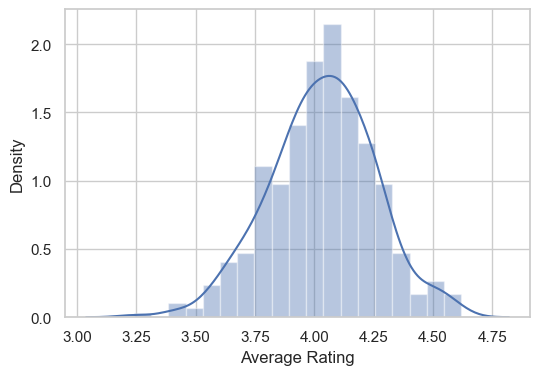

In [27]:
# Average Rating Distribution

fig = plt.figure(figsize=(6,4))
sns.distplot(df.Rating)
plt.xlabel("Average Rating")
plt.show()

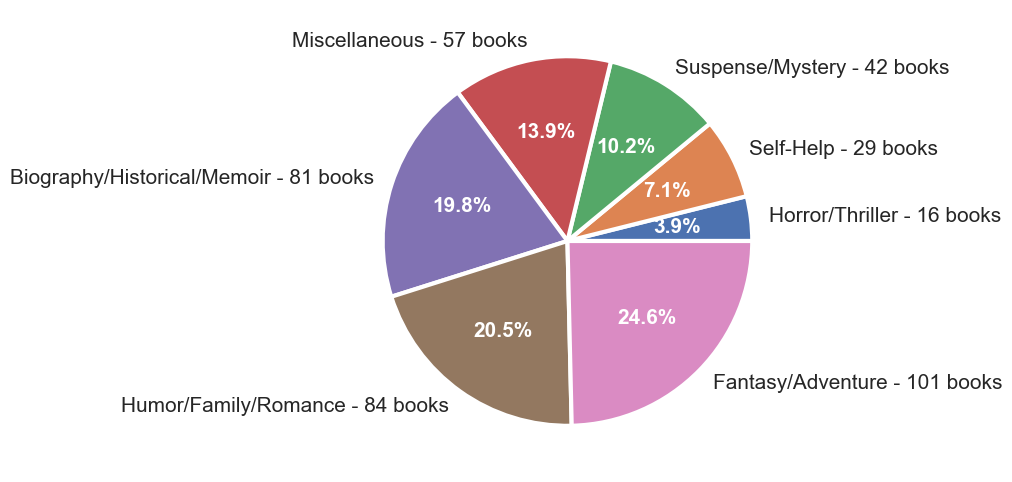

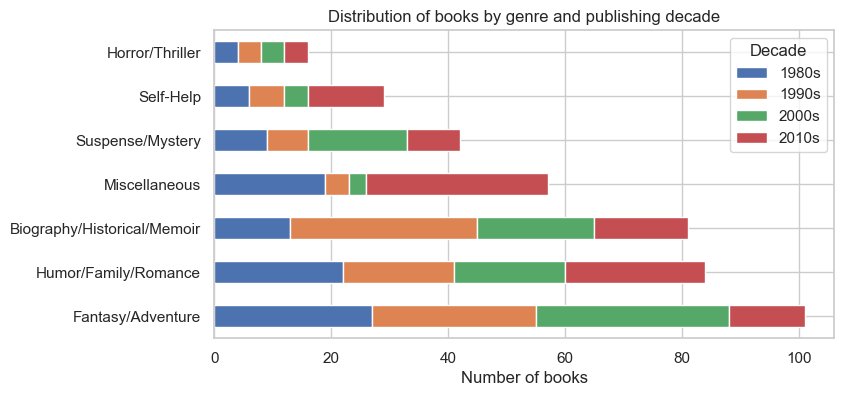

In [30]:
# Genre-wise distribution of books (overall)
genre_dist = df.groupby('final genre')['Name'].size().reset_index().sort_values(by='Name')
genre_rating = df.groupby('final genre')['Rating','RatingDistTotal'].agg({'Rating':'mean','RatingDistTotal':'sum'}).reset_index().sort_values(by='Rating',ascending=False)


def genre_wise_distribution_plots():
    # pie chart (genre wise)
    fig= plt.subplots(figsize=(6,6))
    patches, texts, autotexts = plt.pie(x=genre_dist['Name'],
            labels=genre_dist['final genre']+" - "+genre_dist['Name'].astype(str)+ " books",
            wedgeprops = {'linewidth': 3},
            autopct='%1.1f%%',      
            )
#     plt.title("Distribution of books by genre (in percentage)")
    for i in range(len(texts)):
        texts[i].set_fontsize(15)
        autotexts[i].set_fontsize(15)
        autotexts[i].set_color('white')
        autotexts[i].set_fontweight('bold')


    # bar plot (genre wise, hue: publish decade)
    df_plot = df.groupby(['Decade', 'final genre']).size().reset_index().pivot(columns='Decade', index='final genre', values=0)
    df_plot['sum']  = df_plot['1980s']+df_plot['1990s']+df_plot['2000s']+df_plot['2010s']
    df_plot = df_plot.sort_values(by='sum',ascending=False).iloc[:,:-1]

    fig,ax= plt.subplots(figsize=(8,4))
    df_plot.plot(kind='barh', stacked=True,ax=ax)
    ax.set_xlabel('Number of books', fontsize=12);
    ax.set_ylabel('', fontsize=12);

    ax.set_title("Distribution of books by genre and publishing decade")
    plt.show()


genre_wise_distribution_plots()

In [7]:
def calc_std_deviation(ratings, number_of_ratings):
    ratings = ratings.to_numpy().astype('float64')
    ## Probability of ratings is each rating divided by total ratings
    probability_ratings = ratings/number_of_ratings
    
    ## We now do \sum_{1}^{5} Xp(x)
    x = np.array([5,4,3,2,1], dtype=float)
    x = x.reshape(1,5)
    weighted_x = x * probability_ratings
    expected_values = np.sum(weighted_x, axis=1, keepdims=True)
    
    ##Variance Calculation
    diff_ratings = x - expected_values
    diff_ratings_squared = diff_ratings**2

    weighted_diff_squared = diff_ratings_squared * probability_ratings
    variance_ratings = np.sum(weighted_diff_squared, axis=1)
    
    stddev_ratings = np.sqrt(variance_ratings)


    stddev_ratings = stddev_ratings.reshape(-1,1)
    return stddev_ratings


ratings = df[['RatingDist5', 'RatingDist4', 'RatingDist3', 'RatingDist2','RatingDist1']]
number_of_ratings = df[['RatingDistTotal']].to_numpy().reshape(-1,1)
ratings_std_dev = calc_std_deviation(ratings, number_of_ratings)

In [8]:
controversial_books = pd.DataFrame(columns=df.columns)
normal_books = pd.DataFrame(columns=df.columns)
thres_max = np.percentile(ratings_std_dev,99) # extracting books with std dev greater than 99 percentile
thres_min = np.percentile(ratings_std_dev,1) # extracting books with std dev lesser than 1 percentile

for i,j in enumerate(ratings_std_dev):
    if j[0]>=thres_max:
        controversial_books = controversial_books.append(df.iloc[i,:]) # obtain sample of controversial books
    if j[0]<=thres_min:
        normal_books = normal_books.append(df.iloc[i,:]) # obtain sample of normal books
        
# melt both dataframes to create a column for number of 1 to 5 start ratings for each book
group1 = controversial_books.melt(id_vars=['Name'],
                                 value_vars=['RatingDist5','RatingDist4','RatingDist3','RatingDist2','RatingDist1'],
                                 var_name='Ratings',
                                 value_name='Total Ratings')
group1['Ratings'] = group1['Ratings'].map({i:i[-1]+" star" for i in ['RatingDist5','RatingDist4','RatingDist3','RatingDist2','RatingDist1']})
group1.sort_values(by=['Name','Ratings'],inplace=True)
group2 = normal_books.melt(id_vars=['Name'],
                                 value_vars=['RatingDist5','RatingDist4','RatingDist3','RatingDist2','RatingDist1'],
                                 var_name='Ratings',
                                 value_name='Total Ratings')
group2['Ratings'] = group2['Ratings'].map({i:i[-1]+" star" for i in ['RatingDist5','RatingDist4','RatingDist3','RatingDist2','RatingDist1']})
group2.sort_values(by=['Name','Ratings'],inplace=True)

In [65]:
def plot_stddev_vs_ratings():
    fig = plt.figure(figsize=(12,5))
    sns.scatterplot(x=ratings_std_dev.reshape(-1),
                    y=number_of_ratings.reshape(-1),
                    color='lightskyblue')
    sns.scatterplot(x=ratings_std_dev[controversial_books.index].reshape(-1),
                    y=number_of_ratings[controversial_books.index].reshape(-1),
                    color='orange')
    sns.scatterplot(x=ratings_std_dev[normal_books.index].reshape(-1),
                    y=number_of_ratings[normal_books.index].reshape(-1),
                    color='green')

    plt.xlabel("Standard Deviation")
    plt.ylabel("Number of Ratings")
    plt.legend(['All books','Controversial books','Non-controversial books'])
    plt.title("Std Dev (vs) Number of Ratings")
    
    plt.show()
    
def plot_book_rating_dist(df,color):
    for i in df.Name.unique():
        fig,ax = plt.subplots(figsize=(8,3))
        sns.barplot(data=df[df.Name==i],x='Ratings',y='Total Ratings',ax=ax,color=color);
        ax.set_title(i)
        ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

def plot_ratings_bar(df,two_books,color):
    fig,ax = plt.subplots(figsize=(6,8),nrows=2)
    for i,j in enumerate(two_books):
        splot = sns.barplot(data=df[df.Name==j],x='Ratings',y='Total Ratings',ax=ax[i],color=color,
                           width=0.5);
        ax[i].set_title(j)
        ax[i].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        ax[i].set_xlabel("")
#         try:
#             ax[1].set_ylabel("")
#         except:
#             pass



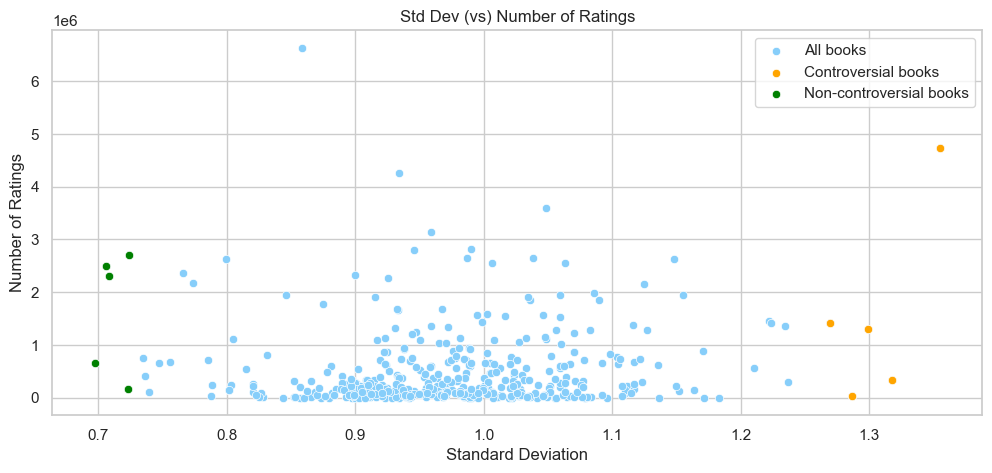

In [66]:
plot_stddev_vs_ratings()

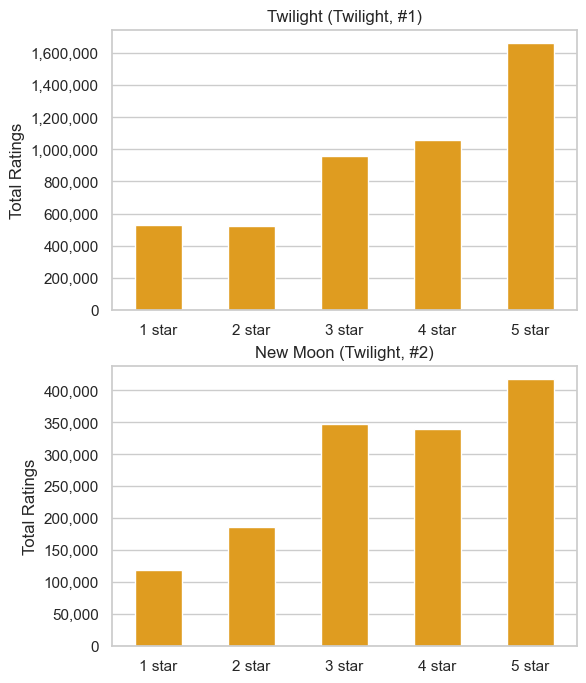

In [67]:
# Two of the most controversial books
books1 = ["Twilight (Twilight, #1)","New Moon (Twilight, #2)"]
plot_ratings_bar(group1,books1,'orange')

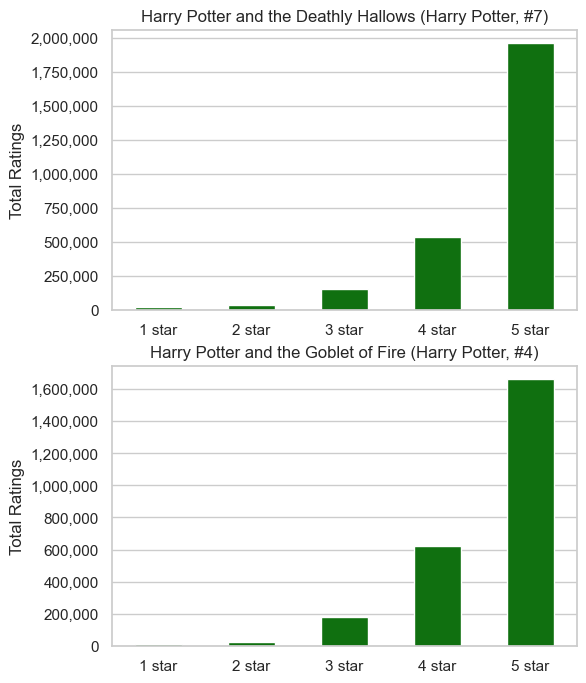

In [68]:
# Two of the most non-controversial books
books2 = ["Harry Potter and the Deathly Hallows (Harry Potter, #7)", "Harry Potter and the Goblet of Fire (Harry Potter, #4)"] 
plot_ratings_bar(group2,books2,'green')